In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("dataset_phishing.csv")

In [3]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
identical_columns = []
for column in dataset.describe().columns:
    if dataset.describe().loc['std',column] == 0 :
        identical_columns.append(column)
identical_columns

['nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh']

In [5]:
for column in identical_columns:
    del dataset[column]

In [6]:
dataset['target'] = pd.get_dummies(dataset['status'])['legitimate'].astype('int')

In [7]:
del dataset['status']

In [10]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [12]:
dataset.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,https://www.onlinejankari.net/no-account-mappe...,61,21,0,2,4,0,0,0,0,...,1,1,0,97,1364,140970,0,0,2,1
1,https://autodiscover.gre.ac.uk/owa/auth/logon....,98,22,0,7,0,0,1,1,2,...,1,0,0,0,-1,79585,0,1,6,0
2,https://sunge-ode.firebaseapp.com/,34,25,0,2,1,0,0,0,0,...,1,0,0,84,2837,0,0,1,2,0
3,http://www.definitions.net/definition/Database,46,19,0,2,0,0,0,0,0,...,1,1,0,632,6673,6923,0,0,5,1
4,http://www.carolinamariculture.com/,35,27,0,2,0,0,0,0,0,...,1,1,0,566,2356,0,0,0,2,1


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_eq                       11430 non-null  int64  
 9   nb_underscore               11430 non-null  int64  
 10  nb_tilde                    11430 non-null  int64  
 11  nb_percent                  11430 non-null  int64  
 12  nb_slash                    11430 non-null  int64  
 13  nb_star                     114

In [20]:
dataset = dataset.drop(['url'], axis = 1).copy()

In [22]:
#Sepratating & assigning features and target columns to X & y
y = dataset['target']
X = dataset.drop('target',axis=1)
X.shape, y.shape

((11430, 81), (11430,))

In [23]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9144, 81), (2286, 81))

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [26]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.938
Decision Tree: Accuracy on test Data: 0.930


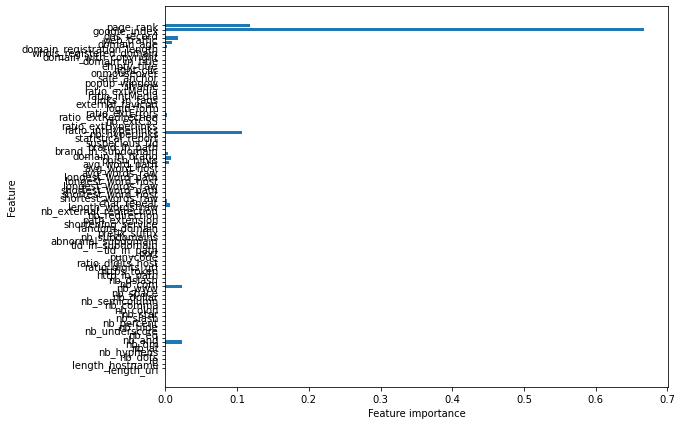

In [29]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [30]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [31]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [32]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [33]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.949
Random forest: Accuracy on test Data: 0.942


In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)